In [3]:
!pip install pandas

  Using cached pandas-2.1.3-cp310-cp310-macosx_11_0_arm64.whl (10.9 MB)
  Using cached pytz-2023.3.post1-py2.py3-none-any.whl (502 kB)
  Using cached tzdata-2023.3-py2.py3-none-any.whl (341 kB)

[notice] A new release of pip available: 22.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import os
import pickle
from collections import defaultdict

import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

from genetic import fitness

In [3]:
def is_valid(g, s):
    return all(sum(s[v_int] for v in g[n] if (v_int := int(v))) >= 2
               for n in g
               if (n_int := int(n)) and not s[n_int])


### Experimento 1

In [85]:
results = "../data"

data = defaultdict(dict)

for filename in os.listdir(results):
    if filename.endswith('.graphml'):
        file_path = os.path.join(results, filename)
        G = nx.read_graphml(file_path)
        index = filename.split('.')[0]
        index_l = index.split('_')
        index = (int(index_l[0]), int(index_l[1]))
        data[index]['g'] = G
    if filename.endswith('.pkl') and filename.split('.')[0]:
        file_path = os.path.join(results, filename)
        with open(file_path, 'rb') as file:
            r = pickle.load(file)
            print(filename)
            index = filename.split('.')[0]
            index_l = index.split('_')
            index = (int(index_l[0]), int(index_l[1]))
            data[index].update(r)

8_200.pkl
1024_6.pkl
4_742.pkl
32_734.pkl
8_566.pkl
32_720.pkl
8_572.pkl
4_756.pkl
8_214.pkl
16_380.pkl
32_708.pkl
16_394.pkl
8_228.pkl
4_781.pkl
4_959.pkl
32_60.pkl
128_70.pkl
16_419.pkl
32_74.pkl
128_64.pkl
4_795.pkl
16_425.pkl
4_965.pkl
16_343.pkl
8_599.pkl
32_913.pkl
16_357.pkl
32_907.pkl
4_971.pkl
32_48.pkl
128_58.pkl
16_431.pkl
8_764.pkl
32_536.pkl
4_226.pkl
4_540.pkl
32_250.pkl
16_814.pkl
32_244.pkl
4_554.pkl
4_232.pkl
8_770.pkl
32_522.pkl
512_0.pkl
8_758.pkl
16_182.pkl
8_980.pkl
8_56.pkl
256_99.pkl
4_568.pkl
8_42.pkl
16_828.pkl
32_278.pkl
16_196.pkl
8_994.pkl
32_293.pkl
64_24.pkl
256_66.pkl
4_583.pkl
256_72.pkl
4_597.pkl
32_287.pkl
64_30.pkl
16_169.pkl
8_943.pkl
16_141.pkl
16_627.pkl
64_18.pkl
8_95.pkl
16_633.pkl
8_81.pkl
8_957.pkl
16_155.pkl
32_3.pkl
8_610.pkl
32_442.pkl
4_352.pkl
4_42.pkl
4_434.pkl
8_176.pkl
32_324.pkl
16_974.pkl
8_162.pkl
32_330.pkl
16_960.pkl
64_9.pkl
4_420.pkl
4_346.pkl
4_56.pkl
8_604.pkl
32_456.pkl
32_318.pkl
16_790.pkl
16_948.pkl
8_2.pkl
4_408.pkl
16_784

In [86]:
data = pd.DataFrame(data).T
data.sort_index(inplace=True)
data.dropna(inplace=True)
data

alg      alg_t  \
4    0                                          {2, 1, 3}   0.000056   
     1                                          {2, 1, 0}   0.000058   
     2                                          {2, 1, 0}   0.000055   
     3                                          {2, 1, 3}   0.000057   
     4                                          {2, 1, 0}   0.000051   
...                                                   ...        ...   
8192 0  {7900, 7964, 7934, 6863, 6282, 6159, 70, 8149,...  11.645766   
     1  {7964, 7934, 6282, 70, 8149, 8163, 946, 2547, ...  11.659416   
     2  {7841, 6152, 7964, 7934, 6863, 6282, 70, 8149,...  12.109446   
     3  {6152, 7900, 5139, 7934, 6863, 6282, 6159, 814...  12.116993   
     4  {7900, 5139, 7964, 3646, 6863, 6282, 70, 8163,...  11.963563   

                                                      gen      gen_t  \
4    0                                             {1, 3}    0.05122   
     1                                          {0, 1, 2}   0.068503   
     2                                          {0, 1, 2}   0.054192   
     3                                          {0, 1, 3}   0.052343   
     4                                          {0, 1, 2}   0.053705   
...                                                   ...        ...   
8192 0  {0, 1, 2, 3, 5, 6, 10, 11, 12, 14, 16, 17, 21,...  60.801481   
     1  {2, 4, 5, 6, 8, 10, 11, 12, 13, 14, 16, 17, 18...  62.633941   
     2  {0, 2, 6, 11, 14, 16, 18, 24, 26, 27, 29, 30, ...  61.157063   
     3  {1, 6, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 2...  62.186484   
     4  {0, 1, 3, 4, 6, 7, 8, 9, 12, 13, 16, 19, 21, 2...  63.378665   

                                                        g  
4    0                                       (0, 1, 2, 3)  
     1                                       (0, 1, 2, 3)  
     2                                       (0, 1, 2, 3)  
     3                                       (0, 1, 2, 3)  
     4                                       (0, 1, 2, 3)  
...                                                   ...  
8192 0  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...  
     1  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...  
     2  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...  
     3  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...  
     4  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...  

[4510 rows x 5 columns]

In [87]:
def a_is_valid(d, solution):
    s = d[solution]
    s_list = [False] * len(d.g)
    for n in d.g:
        n_int = int(n)
        s_list[n_int] = n_int in s
    return is_valid(d['g'], s_list)

def a_fitness_alg(d):
    s_list = [n in d.alg for n in d.g]
    # print(s)
    # print(s_list)
    # print(d.g)
    dicio = {n: list(d.g[n]) for n in d.g}
    # print(f"{dicio}")
    return fitness(d['g'], s_list)

def a_fitness_gen(d):
    s_list = [False] * len(d.g)
    for n in d.g:
        index = int(n)
        s_list[index] = index in d.gen
    # print(s)
    # print(s_list)
    # print(d.g)
    dicio = {n: list(d.g[n]) for n in d.g}
    # print(f"{dicio}")
    return fitness(d['g'], s_list)

In [88]:
data['alg_f'] = data.apply(a_fitness_alg, axis=1)
data['gen_f'] = data.apply(a_fitness_gen, axis=1)
data['gen_v'] = data.apply(a_is_valid, axis=1, args=('gen', ))
data

valid_non_s=0 leafs_on_s=2
valid_non_s=1 leafs_on_s=2
valid_non_s=1 leafs_on_s=2
valid_non_s=0 leafs_on_s=2
valid_non_s=1 leafs_on_s=2
valid_non_s=1 leafs_on_s=2
valid_non_s=1 leafs_on_s=2
valid_non_s=1 leafs_on_s=2
valid_non_s=0 leafs_on_s=2
valid_non_s=1 leafs_on_s=2
valid_non_s=1 leafs_on_s=2
valid_non_s=1 leafs_on_s=2
valid_non_s=0 leafs_on_s=2
valid_non_s=0 leafs_on_s=2
valid_non_s=0 leafs_on_s=2
valid_non_s=1 leafs_on_s=2
valid_non_s=1 leafs_on_s=2
valid_non_s=1 leafs_on_s=2
valid_non_s=0 leafs_on_s=2
valid_non_s=1 leafs_on_s=2
valid_non_s=1 leafs_on_s=2
valid_non_s=1 leafs_on_s=2
valid_non_s=1 leafs_on_s=2
valid_non_s=0 leafs_on_s=2
valid_non_s=0 leafs_on_s=2
valid_non_s=0 leafs_on_s=2
valid_non_s=1 leafs_on_s=2
valid_non_s=0 leafs_on_s=2
valid_non_s=0 leafs_on_s=2
valid_non_s=1 leafs_on_s=2
valid_non_s=1 leafs_on_s=2
valid_non_s=0 leafs_on_s=2
valid_non_s=1 leafs_on_s=2
valid_non_s=1 leafs_on_s=2
valid_non_s=1 leafs_on_s=2
valid_non_s=1 leafs_on_s=2
valid_non_s=0 leafs_on_s=2
v

alg      alg_t  \
4    0                                          {2, 1, 3}   0.000056   
     1                                          {2, 1, 0}   0.000058   
     2                                          {2, 1, 0}   0.000055   
     3                                          {2, 1, 3}   0.000057   
     4                                          {2, 1, 0}   0.000051   
...                                                   ...        ...   
8192 0  {7900, 7964, 7934, 6863, 6282, 6159, 70, 8149,...  11.645766   
     1  {7964, 7934, 6282, 70, 8149, 8163, 946, 2547, ...  11.659416   
     2  {7841, 6152, 7964, 7934, 6863, 6282, 70, 8149,...  12.109446   
     3  {6152, 7900, 5139, 7934, 6863, 6282, 6159, 814...  12.116993   
     4  {7900, 5139, 7964, 3646, 6863, 6282, 70, 8163,...  11.963563   

                                                      gen      gen_t  \
4    0                                             {1, 3}    0.05122   
     1                                          {0, 1, 2}   0.068503   
     2                                          {0, 1, 2}   0.054192   
     3                                          {0, 1, 3}   0.052343   
     4                                          {0, 1, 2}   0.053705   
...                                                   ...        ...   
8192 0  {0, 1, 2, 3, 5, 6, 10, 11, 12, 14, 16, 17, 21,...  60.801481   
     1  {2, 4, 5, 6, 8, 10, 11, 12, 13, 14, 16, 17, 18...  62.633941   
     2  {0, 2, 6, 11, 14, 16, 18, 24, 26, 27, 29, 30, ...  61.157063   
     3  {1, 6, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 2...  62.186484   
     4  {0, 1, 3, 4, 6, 7, 8, 9, 12, 13, 16, 19, 21, 2...  63.378665   

                                                        g  alg_f  gen_f  gen_v  
4    0                                       (0, 1, 2, 3)      2      2  False  
     1                                       (0, 1, 2, 3)      3      3   True  
     2                                       (0, 1, 2, 3)      3      3   True  
     3                                       (0, 1, 2, 3)      2      2  False  
     4                                       (0, 1, 2, 3)      3      3   True  
...                                                   ...    ...    ...    ...  
8192 0  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   6354   2950  False  
     1  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   6333   2938  False  
     2  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   6313   2919  False  
     3  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   6354   2962  False  
     4  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   6362   2959  False  

[4510 rows x 8 columns]

In [89]:
data

alg      alg_t  \
4    0                                          {2, 1, 3}   0.000056   
     1                                          {2, 1, 0}   0.000058   
     2                                          {2, 1, 0}   0.000055   
     3                                          {2, 1, 3}   0.000057   
     4                                          {2, 1, 0}   0.000051   
...                                                   ...        ...   
8192 0  {7900, 7964, 7934, 6863, 6282, 6159, 70, 8149,...  11.645766   
     1  {7964, 7934, 6282, 70, 8149, 8163, 946, 2547, ...  11.659416   
     2  {7841, 6152, 7964, 7934, 6863, 6282, 70, 8149,...  12.109446   
     3  {6152, 7900, 5139, 7934, 6863, 6282, 6159, 814...  12.116993   
     4  {7900, 5139, 7964, 3646, 6863, 6282, 70, 8163,...  11.963563   

                                                      gen      gen_t  \
4    0                                             {1, 3}    0.05122   
     1                                          {0, 1, 2}   0.068503   
     2                                          {0, 1, 2}   0.054192   
     3                                          {0, 1, 3}   0.052343   
     4                                          {0, 1, 2}   0.053705   
...                                                   ...        ...   
8192 0  {0, 1, 2, 3, 5, 6, 10, 11, 12, 14, 16, 17, 21,...  60.801481   
     1  {2, 4, 5, 6, 8, 10, 11, 12, 13, 14, 16, 17, 18...  62.633941   
     2  {0, 2, 6, 11, 14, 16, 18, 24, 26, 27, 29, 30, ...  61.157063   
     3  {1, 6, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 2...  62.186484   
     4  {0, 1, 3, 4, 6, 7, 8, 9, 12, 13, 16, 19, 21, 2...  63.378665   

                                                        g  alg_f  gen_f  gen_v  
4    0                                       (0, 1, 2, 3)      2      2  False  
     1                                       (0, 1, 2, 3)      3      3   True  
     2                                       (0, 1, 2, 3)      3      3   True  
     3                                       (0, 1, 2, 3)      2      2  False  
     4                                       (0, 1, 2, 3)      3      3   True  
...                                                   ...    ...    ...    ...  
8192 0  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   6354   2950  False  
     1  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   6333   2938  False  
     2  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   6313   2919  False  
     3  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   6354   2962  False  
     4  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   6362   2959  False  

[4510 rows x 8 columns]

In [90]:
dt = data.iloc[10]
s = dt.alg
s_list = [n in s for n in dt.g]
fitness(dt.g, s_list)

valid_non_s=1 leafs_on_s=2


3

In [91]:
type(data.index)

pandas.core.indexes.multi.MultiIndex

<Axes: title={'center': 'runtime'}>

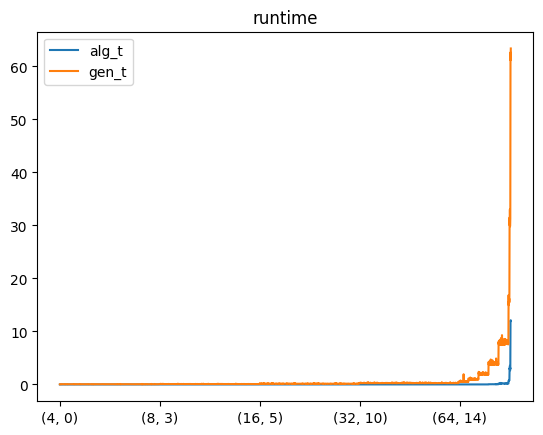

In [92]:
data[["alg_t", "gen_t"]].plot(title='runtime')

<Axes: title={'center': 'fitness'}>

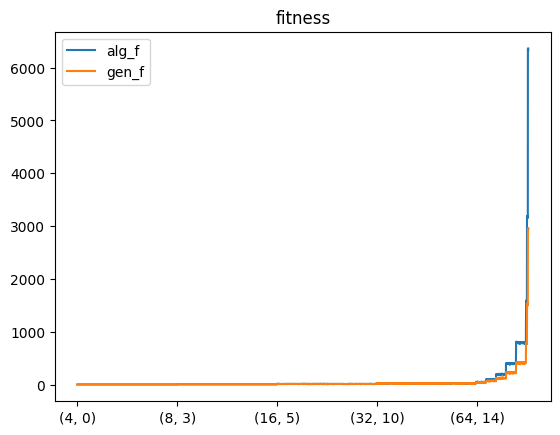

In [93]:
data[["alg_f", "gen_f"]].plot(title='fitness')

In [94]:
data_avgs = data.reset_index(level=1).groupby(level=0)[['alg_t', 'alg_f', 'gen_t', 'gen_f']].mean()
data_avgs

,alg_t,alg_f,gen_t,gen_f
4,0.000064,2.498495,0.054233,2.498495
8,0.000092,5.687375,0.083903,5.720441
16,0.000169,11.625126,0.145616,11.725628
32,0.000385,23.985944,0.266028,22.710843
64,0.001154,48.800000,0.524936,39.730000
128,0.003528,98.030000,0.996034,68.680000
256,0.012573,197.040000,1.988301,121.620000
512,0.047672,396.230000,3.932764,222.010000
1024,0.186014,791.090000,7.933793,412.840000
2048,0.748623,1576.400000,15.872667,775.900000


<Axes: title={'center': 'runtime'}>

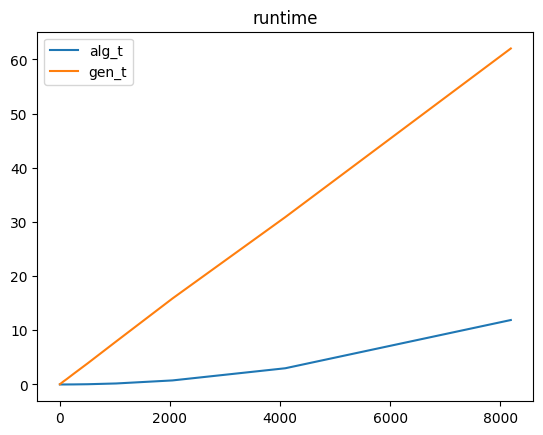

In [95]:
data_avgs[["alg_t", "gen_t"]].plot(title='runtime')

<Axes: title={'center': 'fitness'}>

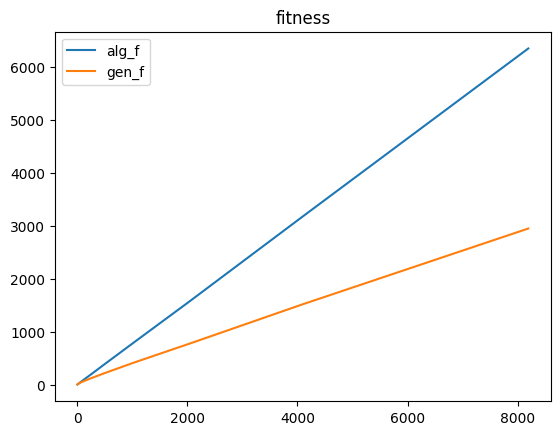

In [96]:
data_avgs[["alg_f", "gen_f"]].plot(title='fitness')